## Importing libraries

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

In [33]:
CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

## Loading data

In [36]:
training_generator = ImageDataGenerator(
        rescale=1/255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05
)
validation = ImageDataGenerator(
        rescale=1/255
)

training_iterator= training_generator.flow_from_directory(
    "./Covid19-dataset/train",
    class_mode = CLASS_MODE,
    color_mode= COLOR_MODE,
    target_size=TARGET_SIZE,
    batch_size = BATCH_SIZE, 

    )

validation_iterator= training_generator.flow_from_directory(
    "./Covid19-dataset/test",
    class_mode = CLASS_MODE,
    color_mode= COLOR_MODE,
    target_size=TARGET_SIZE,
    batch_size = BATCH_SIZE, 
    )

print(training_iterator.class_indices)
print(validation_iterator.class_indices)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}


## Designing models

### Baseline model

In [37]:
model = Sequential()
model.add(tf.keras.Input(shape=(256,256,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss= tf.keras.losses.CategoricalCrossentropy, 
              metrics=[tf.keras.metrics.CategoricalAccuracy,tf.keras.metrics.AUC])
model.summary()


STEP_SIZE_TRAIN = training_iterator.samples//BATCH_SIZE
STEP_SIZE_VALID =  validation_iterator.samples//BATCH_SIZE
model.fit(
          training_iterator,
          steps_per_epoch=STEP_SIZE_TRAIN, 
          epochs=40, 
          validation_data=validation_iterator,
          validation_steps=STEP_SIZE_VALID
        )

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │       196,611 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,611 (768.01 KB)

 Trainable params: 196,611 (768.01 KB)

 Non-trainable params: 0 (0.00 B)

/Users/victorchau/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - auc_7: 0.5268 - categorical_accuracy: 0.3455 - loss: 14.5991 - val_auc_7: 0.5171 - val_categorical_accuracy: 0.3125 - val_loss: 9.9737
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_7: 0.5466 - categorical_accuracy: 0.3333 - loss: 7.0124 - val_auc_7: 1.0000 - val_categorical_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/40
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - auc_7: 0.4854 - categorical_accuracy: 0.2812 - loss: 11.7870

/Users/victorchau/opt/anaconda3/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - auc_7: 0.6306 - categorical_accuracy: 0.4536 - loss: 7.2500 - val_auc_7: 0.7194 - val_categorical_accuracy: 0.6250 - val_loss: 5.2855
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_7: 0.7832 - categorical_accuracy: 0.6875 - loss: 4.5066 - val_auc_7: 0.7500 - val_categorical_accuracy: 0.5000 - val_loss: 2.0602
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - auc_7: 0.8247 - categorical_accuracy: 0.7066 - loss: 2.4892 - val_auc_7: 0.7388 - val_categorical_accuracy: 0.6250 - val_loss: 5.3305
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_7: 0.8477 - categorical_accuracy: 0.7500 - loss: 3.5425 - val_auc_7: 0.1250 - val_categorical_accuracy: 0.0000e+00 - val_loss: 14.1548
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - auc_7: 0.8418 - categorical_accuracy: 0.7327 - loss: 2.8839 - val_auc_7: 0.8683 - val_categorical_accuracy: 0.7656 - val_loss: 1.8712
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_7: 0.9124 - categorical_ac

2024-11-21 11:17:28.396466: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


### Final model

In [53]:
model = Sequential()
model.add(tf.keras.Input(shape=(256,256,1)))
model.add(tf.keras.layers.Conv2D(8,5,strides=2,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(8,5,strides=2,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss= tf.keras.losses.CategoricalCrossentropy, 
              metrics=[tf.keras.metrics.CategoricalAccuracy,tf.keras.metrics.AUC(name='auc')])
model.summary()


STEP_SIZE_TRAIN = training_iterator.n//training_iterator.batch_size
STEP_SIZE_VALID =  validation_iterator.n//validation_iterator.batch_size
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
history = model.fit(training_iterator,
          steps_per_epoch=STEP_SIZE_TRAIN, 
          epochs=70, 
          validation_data=validation_iterator,
          validation_steps=STEP_SIZE_VALID,
          callbacks=[early_stopping]
        )

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 8)      │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │         5,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,219 (28.20 KB)

 Trainable params: 7,219 (28.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - auc: 0.5772 - categorical_accuracy: 0.3966 - loss: 1.0842 - val_auc: 0.6139 - val_categorical_accuracy: 0.3906 - val_loss: 1.0742
Epoch 2/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.5579 - categorical_accuracy: 0.3125 - loss: 1.1283 - val_auc: 0.6250 - val_categorical_accuracy: 0.5000 - val_loss: 1.0482
Epoch 3/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - auc: 0.7042 - categorical_accuracy: 0.5055 - loss: 1.0137 - val_auc: 0.7241 - val_categorical_accuracy: 0.5469 - val_loss: 1.0351
Epoch 4/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6592 - categorical_accuracy: 0.5000 - loss: 1.0357 - val_auc: 0.6250 - val_categorical_accuracy: 0.5000 - val_loss: 1.0241
Epoch 5/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - auc: 0.7860 - categorical_accuracy: 0.5758 - loss: 0.9511 - val_auc: 0.7729 - val_categorical_accuracy: 0.5156 - val_loss: 0.9271
Epoch 6/70
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8499 - categorical_accuracy: 0.6562 -

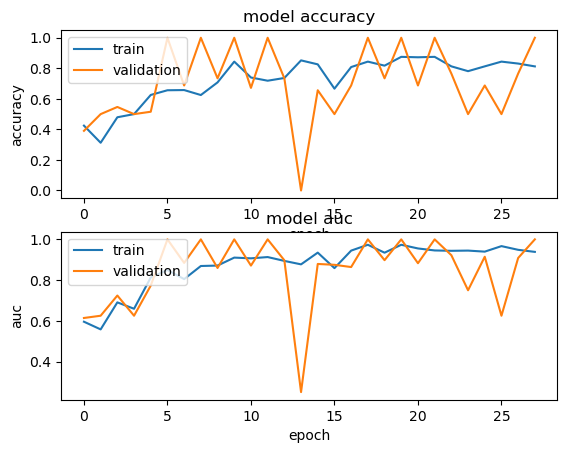

In [55]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

In [63]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / BATCH_SIZE)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / BATCH_SIZE)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

/var/folders/91/8q83_0g93vz84qf_0dsbsv6c0000gn/T/ipykernel_14943/5311784.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / BATCH_SIZE)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step 
              precision    recall  f1-score   support

       Covid       0.52      0.54      0.53        26
      Normal       0.32      0.30      0.31        20
   Pneumonia       0.40      0.40      0.40        20

    accuracy                           0.42        66
   macro avg       0.41      0.41      0.41        66
weighted avg       0.42      0.42      0.42        66

[[14  7  5]
 [ 7  6  7]
 [ 6  6  8]]


/var/folders/91/8q83_0g93vz84qf_0dsbsv6c0000gn/T/ipykernel_14943/5311784.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / BATCH_SIZE)
